<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/Laboratorio_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [108]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [53]:
## cargar el dataset
df = pd.read_csv('AirQualityUCI.csv',sep=';', decimal=',', encoding='utf-8'
).drop(columns=["Unnamed: 15", "Unnamed: 16"], errors='ignore')

In [54]:
## ¿cuántas instancias tiene el dataset?
inst = df.shape[0]
print(f"El dataset tiene {inst} instancias.")

El dataset tiene 9357 instancias.


El dataset tiene 9471 instancias.


In [55]:
## ¿cuál es el tipo de datos de cada una de las columnas?
colum = df.dtypes
print("Tipos de datos de cada columna:")
print(colum)

Tipos de datos de cada columna:
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object


In [56]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
cate  = df.select_dtypes(include=['object']).columns
conti = df.select_dtypes(include=['float64', 'int64']).columns

num_cate = len(cate)
num_conti = len(conti)

print(f"El dataset tiene {num_cate} columnas categóricas: {list(cate)}")
print(f"El dataset tiene {num_conti} columnas continuas: {list(conti)}")

El dataset tiene 2 columnas categóricas: ['Date', 'Time']
El dataset tiene 13 columnas continuas: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [59]:
## ¿existen valores nulos en el dataset?

null_values = df.isnull().sum()

print("Valores nulos por columna:")
print(null_values)

total_nulls = null_values.sum()
if total_nulls > 0:
    print(f"El dataset tiene un total de {total_nulls} valores nulos.")
else:
    print("No hay valores nulos en el dataset.")

Valores nulos por columna:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
No hay valores nulos en el dataset.


In [57]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

target_variable = "CO(GT)"

response_type = df[target_variable].dtype

print(f"La variable respuesta es: {target_variable}")
print(f"El tipo de la variable respuesta es: {response_type}")

La variable respuesta es: CO(GT)
El tipo de la variable respuesta es: float64


In [60]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?

variable = ["CO(GT)", "NOx(GT)", "NO2(GT)"]

esta = df[variable].describe()

print("Estadísticos descriptivos de las variables CO, NOx y NO2:")
print(esta)

Estadísticos descriptivos de las variables CO, NOx y NO2:
            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean    -34.207524   168.616971    58.148873
std      77.657170   257.433866   126.940455
min    -200.000000  -200.000000  -200.000000
25%       0.600000    50.000000    53.000000
50%       1.500000   141.000000    96.000000
75%       2.600000   284.000000   133.000000
max      11.900000  1479.000000   340.000000


¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

In [62]:
# Verificar valores nulos para las variables de interés
missing_data = df[variable].isnull().sum()

print("Datos faltantes por variable:")
print(missing_data)

Datos faltantes por variable:
CO(GT)     0
NOx(GT)    0
NO2(GT)    0
dtype: int64


In [63]:
## ¿cómo son las correlaciones entre las variables del dataset?
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041411  0.128351 -0.031378       0.029926   
PT08.S1(CO)    0.041411     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.128351     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)      -0.031378     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.029926     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.526451     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.089981     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.671127     0.154030  0.103307 -0.010992       0.176488   
PT08.S4(NO2)  -0.073724     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.080310     0.892434  0.101185  0.641334       0.909905   
T             -0.068939     0.754844 -0.000009  0.971375       0.669025   
RH            -0.048227     0.745375  0.008284  0.925062       0.585803   
AH

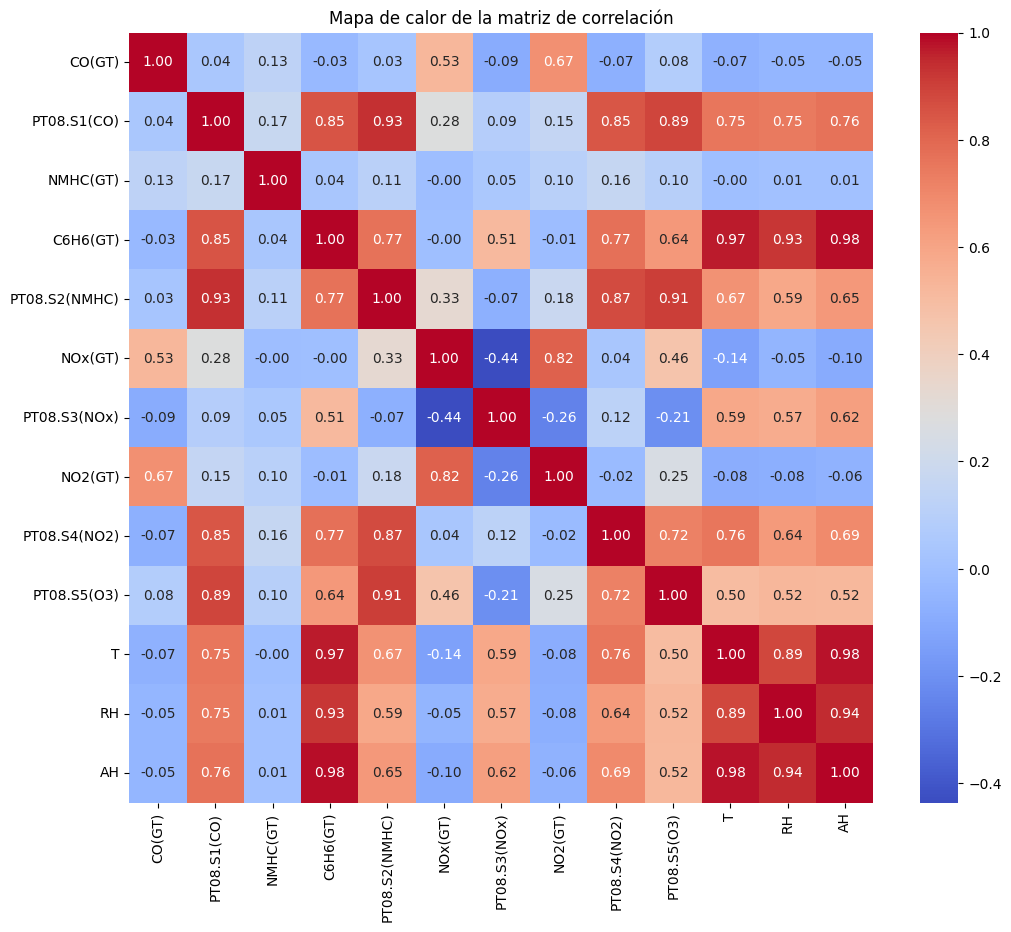

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

In [65]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

target_variable = "CO(GT)"

correlations_with_target = numerical_columns.corr()[target_variable].drop(target_variable)

top_3_correlated = correlations_with_target.abs().sort_values(ascending=False).head(3)

print("Las tres variables más correlacionadas con la variable objetivo:")
print(top_3_correlated)

Las tres variables más correlacionadas con la variable objetivo:
NO2(GT)     0.671127
NOx(GT)     0.526451
NMHC(GT)    0.128351
Name: CO(GT), dtype: float64


In [66]:
## ¿existe alguna variable que no tenga correlación?

correlation_matrix = numerical_columns.corr()

no_corr = 0.1

uncorrelated_variables = (correlation_matrix.abs() < no_corr).all()

variables_without_correlation = uncorrelated_variables[uncorrelated_variables].index

if len(variables_without_correlation) > 0:
    print("Variables que no tienen correlación significativa con otras:")
    print(list(variables_without_correlation))
else:
    print("Todas las variables tienen alguna correlación significativa con al menos otra.")

Todas las variables tienen alguna correlación significativa con al menos otra.


En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

### Distribución de las variables:

Las variables como CO(GT), NOx(GT) y NO2(GT) muestran distribuciones asimétricas, lo que indica posibles datos sesgados.
La presencia de datos extremos (outliers) podría afectar el rendimiento de los modelos sensibles a estos valores, como la regresión lineal.

### Datos faltantes:

Existen valores nulos en varias columnas, lo que requiere imputación o eliminación para evitar problemas durante el entrenamiento del modelo.

### Relaciones entre variables:

Algunas variables muestran correlaciones significativas (positivas o negativas), lo que indica relaciones lineales útiles para modelos como regresión lineal.
Variables con baja correlación con la variable objetivo podrían no ser relevantes para el modelo y podrían eliminarse para reducir el ruido.

### Colinealidad potencial:

La alta correlación entre algunas variables independientes sugiere posible colinealidad, lo que podría afectar la estabilidad de modelos como regresión lineal.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [74]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
target_variable = "CO(GT)"
predictor_variable = "NOx(GT)"

In [76]:
# separar datos de entrenamiento y test
X = df[[predictor_variable]]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
scaler = StandardScaler()
X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

In [79]:
# entrena el modelo con los datos de entrenamiento
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [81]:
# realiza las predicciones para el conjunto de datos de test
y_pred = linear_model.predict(X_test)

In [82]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

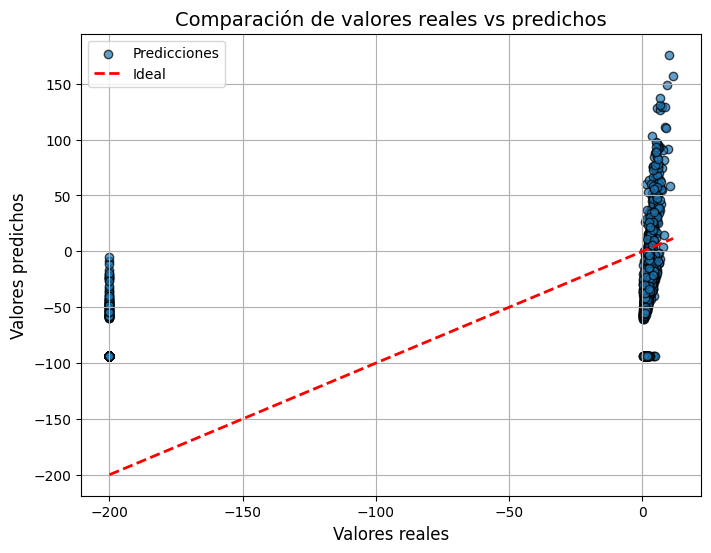

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.title("Comparación de valores reales vs predichos", fontsize=14)
plt.xlabel("Valores reales", fontsize=12)
plt.ylabel("Valores predichos", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# ¿Qué error tiene el modelo? Explícalo.
print("Resultados del modelo de regresión lineal simple:")
print(f"Coeficiente: {linear_model.coef_[0]:.4f}")
print(f"Intercepto: {linear_model.intercept_:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Resultados del modelo de regresión lineal simple:
Coeficiente: 40.6386
Intercepto: -34.4448
Error cuadrático medio (MSE): 4157.7619
Coeficiente de determinación (R²): 0.2963


Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

### Regresión Lineal Multiple

In [86]:
# Definir las variables predictoras (X) y la variable objetivo (y)
predictors = df.drop(columns=["CO(GT)", "Date", "Time"])  # Eliminar la variable objetivo y columnas irrelevantes
target = df["CO(GT)"]  # Variable objetivo

In [87]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [88]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Crear el modelo de regresión lineal múltiple
linear_model = LinearRegression()

In [90]:
# Entrenar el modelo
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
# Hacer predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

In [92]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

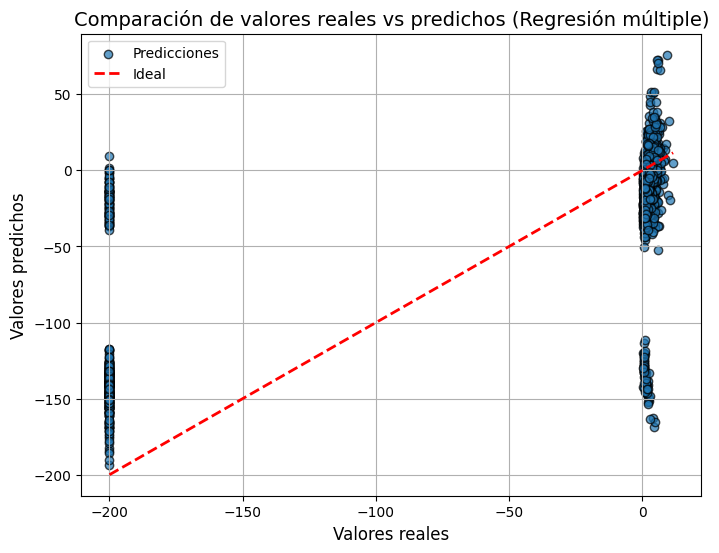

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.title("Comparación de valores reales vs predichos (Regresión múltiple)", fontsize=14)
plt.xlabel("Valores reales", fontsize=12)
plt.ylabel("Valores predichos", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

In [93]:
# Imprimir resultados
print("Resultados del modelo de regresión lineal múltiple:")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print("Coeficientes de las variables predictoras:")
for predictor, coef in zip(predictors.columns, linear_model.coef_):
    print(f"{predictor}: {coef:.4f}")

Resultados del modelo de regresión lineal múltiple:
Error cuadrático medio (MSE): 2863.6090
Coeficiente de determinación (R²): 0.5153
Coeficientes de las variables predictoras:
PT08.S1(CO): -4.3800
NMHC(GT): 7.3097
C6H6(GT): -19.1982
PT08.S2(NMHC): -2.4513
NOx(GT): 9.2311
PT08.S3(NOx): 4.4741
NO2(GT): 48.4370
PT08.S4(NO2): -1.8720
PT08.S5(O3): -3.2479
T: 20.9442
RH: 15.1519
AH: -10.6728


### Conclusión
El modelo de regresión lineal múltiple es mejor según las métricas evaluadas, ya que tiene:
- Un menor MSE (mejor precisión en las predicciones).
- Un mayor R² (mejor capacidad para explicar la variabilidad de los datos).

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

1. **criterion**:
Define la función para medir la calidad de las divisiones:

* **squared_error**: Minimiza el error cuadrático.
* **friedman_mse**: Optimiza usando el estimador de varianza de Friedman.
* **absolute_error**: Minimiza el error absoluto.
* **poisson**: Para datos positivos y dispersos, como conteos.

2. **splitter**:
Estrategia para dividir los nodos:

* **best**: Busca la mejor división posible.
* **random**: Usa una división aleatoria en cada nodo.

3. **max_depth**:
Profundidad máxima del árbol. Controla el sobreajuste; valores más pequeños simplifican el modelo.

4. **min_samples_split**:
Mínimo número de muestras necesarias para dividir un nodo. Valores altos reducen el crecimiento del árbol.

5. **min_samples_leaf**:
Mínimo número de muestras requeridas para formar una hoja. Ayuda a reducir ramas irrelevantes.

6. **max_features**:
Máximo número de características a considerar para cada división. Puede ser un número entero, porcentaje, o "auto" (todas).

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

**min_impurity_decrease** indica el cambio mínimo en la impureza (como la reducción del error) necesario para que se considere realizar una división en un nodo.
Útil para:

* Prevenir divisiones innecesarias.
* Reducir el sobreajuste en datos ruidosos.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [101]:
# Configuración de los hiperparámetros
model_params = {
    "criterion": "poisson",
    "max_depth": 10,
    "min_samples_split": 10,
    "min_samples_leaf": 2,
    "max_features": None  # Usar todas las características
}
model_params["criterion"] = "squared_error"

In [103]:
# Crear el modelo de árboles de decisión
dt_regressor = DecisionTreeRegressor(**model_params)

In [104]:
# Entrenar el modelo
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [105]:
# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt_regressor.predict(X_test)

In [106]:
# Evaluar el modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

Calcula MAE, R2 y RMSLE

In [107]:
# Imprimir resultados
print("Resultados del modelo de regresión con árboles de decisión:")
print(f"Error cuadrático medio (MSE): {mse_dt:.4f}")
print(f"Coeficiente de determinación (R²): {r2_dt:.4f}")

Resultados del modelo de regresión con árboles de decisión:
Error cuadrático medio (MSE): 2911.9058
Coeficiente de determinación (R²): 0.5071


In [109]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)

r2_dt = r2_score(y_test, y_pred_dt)

y_test_positive = np.maximum(0, y_test) + 1e-9
y_pred_dt_positive = np.maximum(0, y_pred_dt) + 1e-9
rmsle_dt = np.sqrt(mean_squared_log_error(y_test_positive, y_pred_dt_positive))

print("Resultados del modelo con árboles de decisión:")
print(f"MAE (Error Absoluto Medio): {mae_dt:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_dt:.4f}")
print(f"RMSLE (Raíz del Error Logarítmico Medio): {rmsle_dt:.4f}")

Resultados del modelo con árboles de decisión:
MAE (Error Absoluto Medio): 23.4079
R² (Coeficiente de Determinación): 0.5071
RMSLE (Raíz del Error Logarítmico Medio): 0.5625


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [110]:
# Evaluar en el conjunto de entrenamiento
y_train_pred = dt_regressor.predict(X_train)

# Calcular métricas en el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular métricas en el conjunto de prueba (ya calculadas previamente)
mae_test = mean_absolute_error(y_test, y_pred_dt)
r2_test = r2_score(y_test, y_pred_dt)

# Imprimir resultados
print("Métricas en el conjunto de entrenamiento:")
print(f"MAE: {mae_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nMétricas en el conjunto de prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"R²: {r2_test:.4f}")

# Comparar diferencias
print("\nDiferencia entre conjunto de entrenamiento y prueba:")
print(f"MAE diferencia: {abs(mae_train - mae_test):.4f}")
print(f"R² diferencia: {abs(r2_train - r2_test):.4f}")

Métricas en el conjunto de entrenamiento:
MAE: 18.4741
R²: 0.6963

Métricas en el conjunto de prueba:
MAE: 23.4079
R²: 0.5071

Diferencia entre conjunto de entrenamiento y prueba:
MAE diferencia: 4.9338
R² diferencia: 0.1891


### Conclusión
No hay un overfitting grave en este modelo, ya que:

* La diferencia en MAE y R² entre entrenamiento y prueba es moderada.
* El modelo mantiene un desempeño razonable en el conjunto de prueba (R² > 0.5), lo que indica que generaliza de manera aceptable.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El modelo de regresión múltiple y el de árboles de decisión son comparables en desempeño (R² ~ 0.51). Sin embargo, la regresión múltiple podría considerarse ligeramente mejor debido a su simplicidad, interpretabilidad, y menor riesgo de sobreajuste en este caso.

Por otro lado, el modelo de árboles de decisión podría ser preferible si las relaciones entre las variables son no lineales o si se optimizan más sus hiperparámetros.


**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

El modelo de regresión lineal múltiple es el mejor en este caso porque:

Tiene el mejor equilibrio entre desempeño (MSE: 2863.61, R²: 0.5153) y simplicidad computacional.
Es interpretable y fácil de implementar en escenarios productivos.
Su simplicidad lo hace menos propenso al sobreajuste en comparación con los árboles de decisión, especialmente con conjuntos de datos moderados.

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Referencia APA: La Cava, W., Singh, T. R., Taggart, J., Suri, S., & Moore, J. H. (2018). Learning concise representations for regression by evolving networks of trees. arXiv preprint arXiv:1807.00981.

Título: Learning concise representations for regression by evolving networks of trees

Autores: William La Cava, Tilak Raj Singh, James Taggart, Srinivas Suri, Jason H. Moore

Revista: arXiv preprint arXiv:1807.00981

Año de publicación: 2018

Objetivo: El objetivo de la investigación es desarrollar un método para aprender representaciones interpretables en tareas de regresión. Los autores buscan representar características como redes de árboles de expresión multi-tipo que incluyen funciones de activación comunes en redes neuronales, además de otras funciones elementales. La meta es equilibrar precisión y complejidad en los modelos de regresión, facilitando su generalización e interpretación.

In [111]:
# Cargar el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

In [112]:
# Exploración inicial
print(data.head())
print(data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [113]:
# Verificar valores nulos
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [114]:
# Separar variables predictoras y objetivo
X = data.drop('quality', axis=1)
y = data['quality']

In [115]:
# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [119]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [120]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.50
MSE: 0.39
R²: 0.40


###Conclusión:

Este ejemplo ilustra cómo aplicar técnicas de regresión a un conjunto de datos abierto, siguiendo una metodología similar a la presentada en el artículo de La Cava et al. (2018). Aunque no replicamos exactamente el enfoque del artículo, este ejercicio proporciona una comprensión práctica de la construcción y evaluación de modelos de regresión.